#Parte 1 - Operações com Pandas e Python - OBS: Pequenos detalhes a serem corrigidos como a tradução das colunas e alguns insights!
Usamos programas de TV e filmes listados no conjunto de dados Netflix do Kaggle . O conjunto de dados consiste em programas de TV e filmes disponíveis no Netflix a partir de 2008 até 2021.

**Filmes e programas de TV da Netflix - Análise de dados e visualização usando Pandas e Python**

In [1]:
#Bibliotecas de importação
#Importando as bibliotecas de que precisamos.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Carregando o conjunto de dados em CSV utilizando a biblioteca Pandas e nomenado o DataSet, como: netflix_df**


In [2]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")

**Verificando os primeiros 5 dados.**

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Verificando os ultimos 5 dados.**

In [4]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# Verificação de todo DataFrame

In [5]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
netflix_df.shape

(8807, 12)

**Descrição em números, percentual e medianas pelo ano de lançamento**

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Verificando existencia de arquivos duplicados e somando caso exista**

In [8]:
netflix_df.duplicated().sum()

0

**O conjunto de dados contém mais de 8807 linhas e 12 colunas. Após uma rápida visualização dos dados, encontramos dados de filme / TV sem classificações. Também podemos ver que existem valores NaN em algumas colunas na visualização logo abaixo.**

In [9]:
#Verificação Das Colunas
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Preparação e limpeza de dados**

**Limpeza de dados significa o processo de identificar dados incorretos, incompletos, imprecisos, irrelevantes ou ausentes e, em seguida, modificá-los, substituí-los ou excluí-los conforme necessário. A limpeza de dados é considerada um dos elementos básicos da engenharia de dados.**

In [10]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Pelas informações, sabemos que existem 8807 linhas e 12 colunas para trabalhar neste DataFrame. Existem algumas colunas que contêm valores nulos,  "Diretor", "Elenco", "Pais", "Data_Adicao", "Avaliacao".**

**Colunas que possuem valor ausente**

In [11]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


**Utilização laço de repetição FOR IN para verificação em percentual dos valores ausentes com utilização da formtação, f'STRING**

In [12]:
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum()/len(netflix_df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [13]:
netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
netflix_df.isnull().sum().sum()

4307

**Há um total de 4.307 valores nulos em todo o conjunto de dados com 2.634 pontos ausentes em "Diretor", 825 em "Elenco", 831 em "Pais", 10 em "Data_Adicao", 4 em "Avaliacao" e 3 em "Duracao. Teremos que lidar com todos os pontos de dados nulos antes de mergulharmos na modelagem.**

**A imputação é um método de tratamento para valores ausentes, preenchendo-os com o uso de certas técnicas. Pode-se usar a média(mean), modo ou modelagem preditiva. Neste módulo, discutiremos o uso da função fillna do Pandas para esta imputação. Tratando as linhas que contêm valores ausentes. Podemos também usar a função dropna do Pandas.**

In [15]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df['cast'].replace(np.nan,'No data',inplace=True)
netflix_df['director'].replace(np.nan,'No data',inplace=True)
netflix_df.dropna(inplace=True)
netflix_df.drop_duplicates(inplace=True)

**A maneira mais fácil de se livrar deles seria excluir as linhas com os dados ausentes para os valores ausentes. No entanto, isso não seria benéfico para nosso DataFrame, pois é uma perda de informações. Como “Diretor”, “Elenco” e “Pais” contêm a maioria dos valores nulos, optamos por tratar cada valor ausente que está indisponível. Os outros dois rótulos “Data_Adicao” e “Avaliacao” contêm uma parte insignificante dos dados, portanto, eles são excluídos do conjunto de dados. Finalmente, podemos ver que não há mais valores ausentes no quadro de dados.**

In [16]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

**Análise e Visualização --**
**Análise do conjunto de dados Netflix composto por filmes e programas**

In [17]:
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


**1. Conteúdo Netflix por tipo**
**Vamos comparar o número total de filmes e programas neste conjunto de dados para saber qual deles é a maioria.**

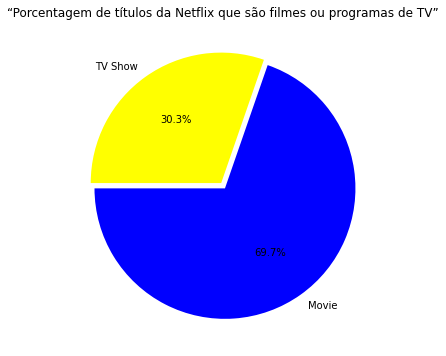

In [18]:
plt.figure(figsize=(12,6))
plt.title("“Porcentagem de títulos da Netflix que são filmes ou programas de TV”")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['blue','yellow'],autopct='%1.1f%%', startangle=180)
plt.show()

**Portanto, existem cerca de 4.000 filmes e quase 2.000 programas de TV, sendo os filmes a maioria. Em termos de título, há muito mais títulos de filmes (69,7%) do que títulos de programas de TV (30,3%).**

**A seguir, exploraremos a quantidade de conteúdo que a Netflix adicionou nos anos anteriores. Como estamos interessados ​​em quando o Netflix adicionou o título em sua plataforma, adicionaremos uma coluna "year_added" para mostrar o ano da data das colunas "date_added".**

In [19]:
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]

In [20]:
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]

In [21]:
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2022]

In [23]:
netflix_year_df

,year,date_added
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [24]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2022]

In [25]:
movies_year_df

,year,date_added
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,836
5,2016,251
6,2015,56
7,2014,19
8,2011,13
9,2013,6


In [26]:
shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2022]

In [27]:
shows_year_df

,year,date_added
0,2020,595
1,2019,592
2,2021,505
3,2018,411
4,2017,349
5,2016,175
6,2015,26
7,2013,5
8,2014,5
9,2008,1


In [28]:
date = pd.DataFrame(netflix_df.date_added.value_counts().reset_index().values, columns=["Date", "Count"])

In [29]:
date

,Date,Count
0,"January 1, 2020",109
1,"November 1, 2019",89
2,"March 1, 2018",75
3,"December 31, 2019",74
4,"October 1, 2018",71
...,...,...
1760,"December 31, 2015",1
1761,"August 3, 2019",1
1762,"August 12, 2019",1
1763,"February 6, 2021",1


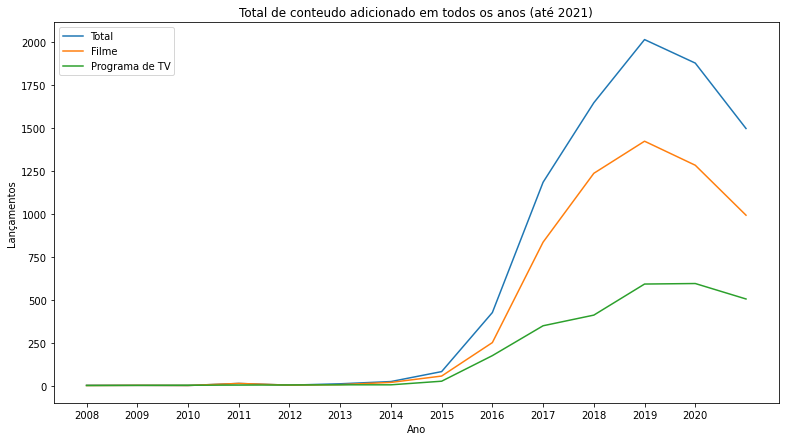

In [30]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total de conteudo adicionado em todos os anos (até 2021)")
plt.legend(['Total', 'Filme', 'Programa de TV'])
plt.ylabel("Lançamentos")
plt.xlabel("Ano")
plt.show()

**Tendo como base a linha do tempo acima, podemos concluir que a popular plataforma de streaming começou a ganhar força a partir de 2014. Desde então, a quantidade de conteúdo adicionado vem aumentando significativamente.**

**Em seguida, vamos explorando a contribuição dos países com maior conteúdo da Netflix.**

In [31]:
pip install plotly

In [32]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

***TRABALHANDO COM GRÁFICOS***

**Agora vamos separar todos os países por adição de filme e antes de analisá-lo vamos remover os títulos sem países disponíveis.**



In [33]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

iplot([go.Choropleth(
    locationmode='country names',
    locations=filtered_countries,
    z=filtered_countries.value_counts()
)])

**Nas imagens acima, podemos ver os 15 principais países contribuintes da Netflix. O país pela quantidade de conteúdo produzido são os Estados Unidos.**

**ABAIXO Os Principais Diretores Na Netflix**

Text(0.5, 1.0, '10 diretores com sua contagem total de filmes')

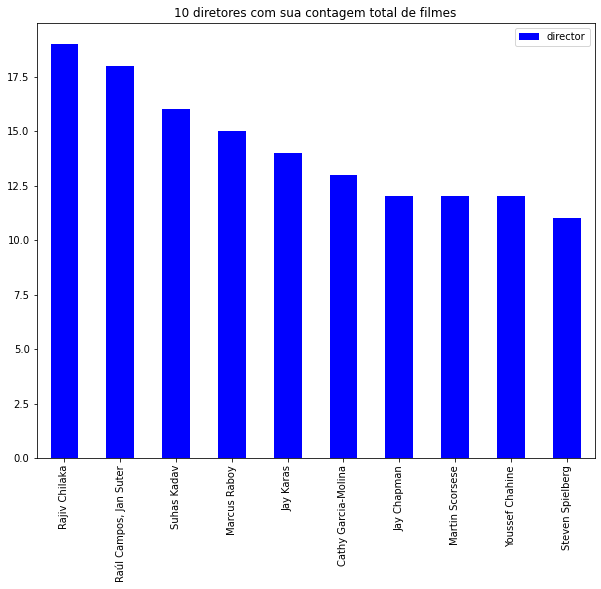

In [34]:
movie_director = netflix_df[netflix_df["type"]=="Movie"]
directorfilm = movie_director["director"].value_counts()[1:]
director_films = pd.DataFrame(directorfilm)

director_films[:10].plot(kind="bar",figsize=(10,8),  color='blue')
plt.title("10 diretores com sua contagem total de filmes")

Text(0.5, 1.0, '10 diretores com sua contagem total de Series')

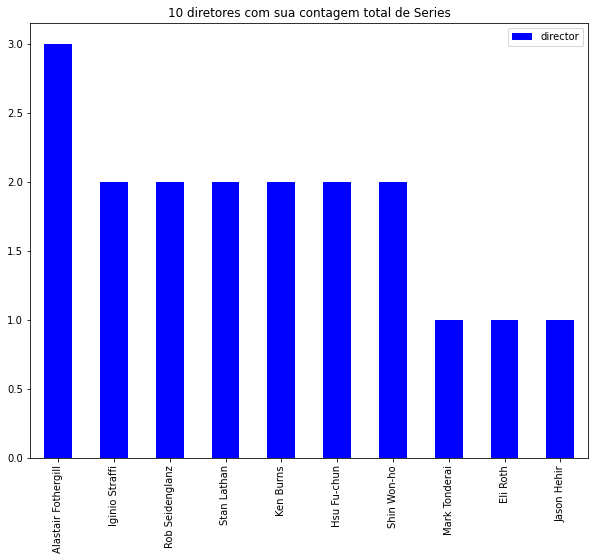

In [35]:
tv_director = netflix_df[netflix_df["type"]=="TV Show"]
directortv = tv_director["director"].value_counts()[1:]
director_tv = pd.DataFrame(directortv)
director_tv[:10].plot(kind="bar", figsize=(10,8),color='blue')
plt.title("10 diretores com sua contagem total de Series")

**Principais gêneros na Netflix**

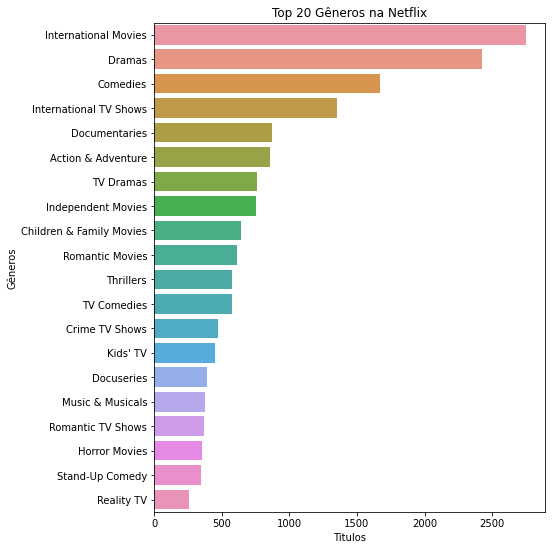

In [36]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Gêneros na Netflix')
plt.xlabel('Titulos')
plt.ylabel('Gêneros')
plt.show()

**Pelo gráfico, sabemos que o Cinema Internacional ocupa o primeiro lugar, seguido de dramas e comédias.**

**Fazendo e respondendo perguntas
Vamos fazer algumas perguntas específicas e tentar respondê-las usando operações de conjunto de dados e visualizações interessantes.**

**P: Qual é a maior contagem de classificação da Netflix?**


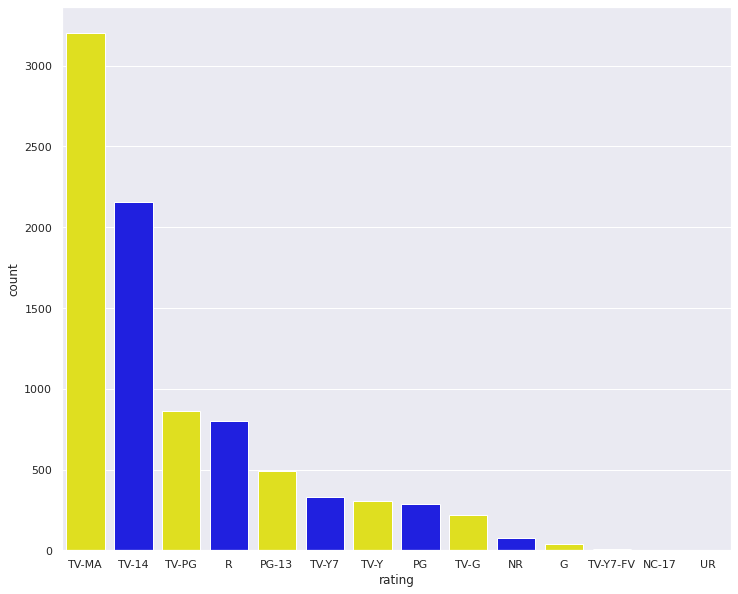

In [37]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette=('Yellow','Blue'), order=netflix_df['rating'].value_counts().index[0:15])

**A maior contagem de filmes é feita com a classificação 'TV-MA'. "TV-MA" é uma classificação atribuída pelas Diretrizes Parentais de TV a um programa de televisão projetado apenas para o público adulto.**

**O segundo maior é a sigla 'TV-14' para conteúdo que pode ser impróprio para crianças menores de 14 anos.**

**A terceira maior é a muito popular classificação 'R'. Um filme classificado como R é um filme que foi avaliado como tendo material que pode ser impróprio para crianças com menos de 17 anos pela Motion Picture Association of America.**

**O crescimento do número de filmes no netflix é muito maior do que o de programas de TV**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



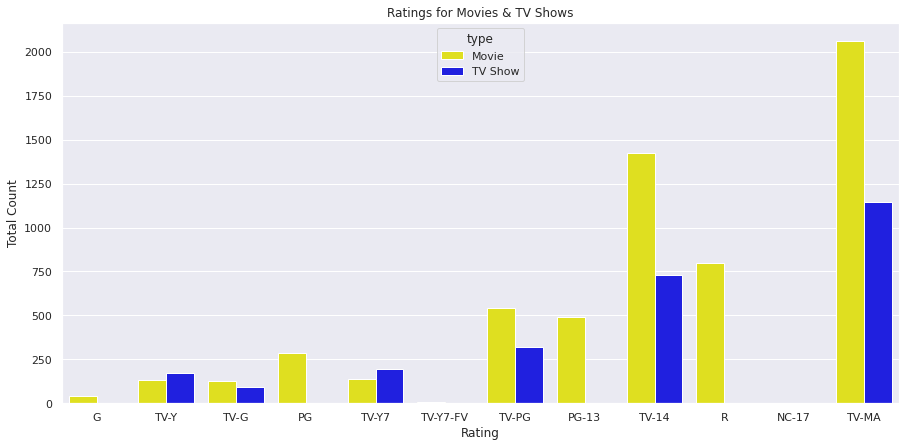

In [38]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_df.rating, hue=netflix_df.type, order=order, palette=('Yellow','Blue'));
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



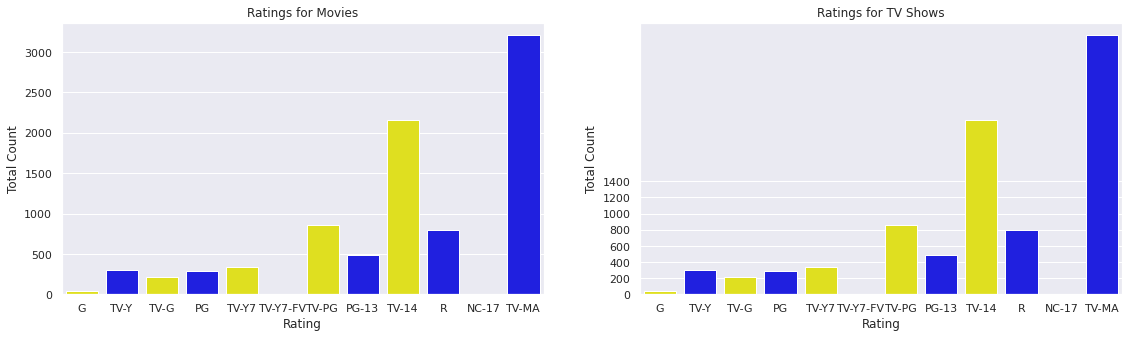

In [39]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(netflix_df.rating, order=order,palette=('Yellow','Blue'), ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(netflix_df.rating, order=order,palette=('Yellow','Blue'), ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

**P: Quem são os 10 principais atores da Netflix?**

Text(0.5, 1.0, '10 principais atores da Netflix')

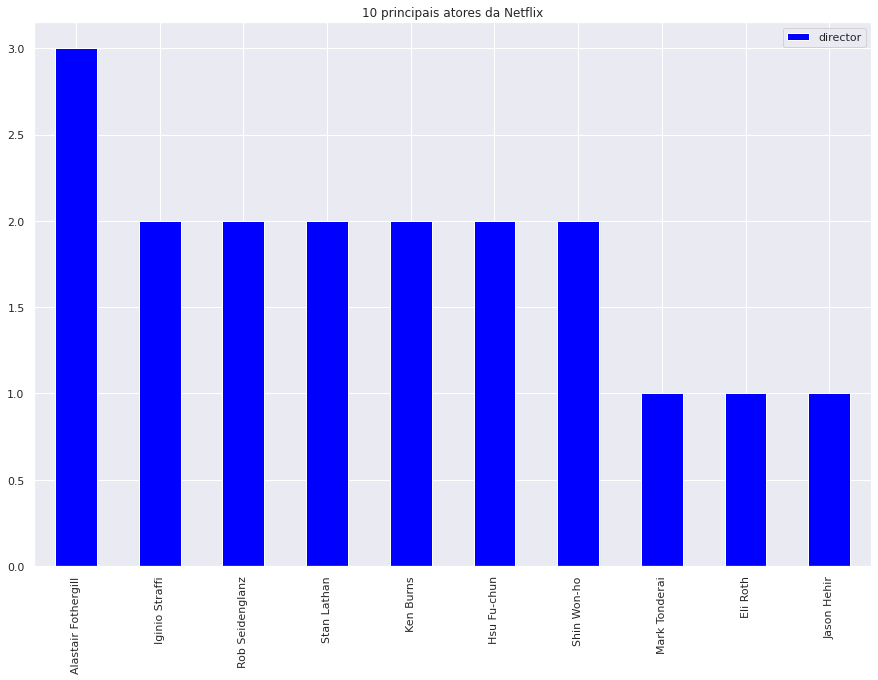

In [40]:
tv_cast = netflix_df[netflix_df["cast"]=="Movie"]
casttv = tv_cast["cast"].value_counts()[:5]
cast_tv = pd.DataFrame(directortv)
cast_tv[:10].plot(kind="bar", figsize=(15,10),color='blue')
plt.title("10 principais atores da Netflix")

P: Quem são os 10 principais países contribuintes da Netflix?

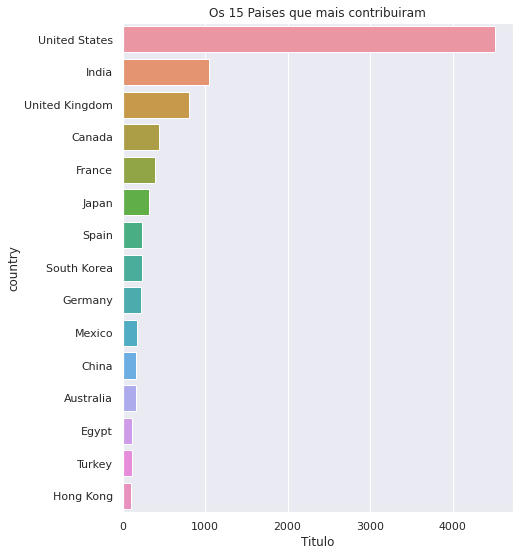

In [41]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Os 15 Paises que mais contribuiram')
plt.xlabel('Titulo')
plt.ylabel('country')
plt.show()

# EFETUANDO A TRADUÇÃO DAS COLUNAS

In [74]:
netflix_df = netflix_df.rename({"show_id":"id_programa","type":"tipo","title":"titulo","director":"diretor","cast":"elenco","country":"pais","date_added":"data_adicionada","release_year":"ano_lancamento","rating":"canal","duration":"duracao","listed_in":"listado_como","description":"descricao"}, axis='columns')

In [75]:
netflix_df

,id_programa,tipo,titulo,diretor,elenco,pais,data_adicionada,ano_lancamento,canal,duracao,listado_como,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [77]:
netflix_df['pais'] = netflix_df['pais'].fillna(netflix_df['pais'].mode()[0])
netflix_df['elenco'].replace(np.nan,'No data',inplace=True)
netflix_df['diretor'].replace(np.nan,'No data',inplace=True)
netflix_df.dropna(inplace=True)
netflix_df.drop_duplicates(inplace=True)

In [78]:
netflix_df.isnull().any()

id_programa        False
tipo               False
titulo             False
diretor            False
elenco             False
pais               False
data_adicionada    False
ano_lancamento     False
canal              False
duracao            False
listado_como       False
descricao          False
dtype: bool

In [79]:
netflix_df.head(10)

,id_programa,tipo,titulo,diretor,elenco,pais,data_adicionada,ano_lancamento,canal,duracao,listado_como,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Como podemos observar nesta analise; A Netflix é muito popular entre várias classes sociais e, como todos sabemos, sua popularidade aumentou durante a pandemia de Covid-19.

Referencia: https://www.kaggle.com/netflix-shows

# Parte 2 - Operações usando PySpark - OBS: Apenas iniciei a parte de PySpark importando as bibliotecas, efetuando a instalação do pyspark, efetuando a leitura do CSV, criação do DataFrame via Pandas x StrucType e efetuando 1 filtro, ordenando e agrupando o mesmo: title x duration

**Instalação biblioteca necessárioas**

In [121]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window as W

In [122]:
spark = SparkSession \
        .builder \
        .config('/content/netflix_titles.csv') \
        .getOrCreate()

In [123]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")

# Criação do DataFrame

**Atraves do Pandas, utilizando o StrucType.**

In [124]:
netflixspark_df = spark.createDataFrame(netflix_df,
                              StructType([
                                StructField('id_programa', StringType()),
                                StructField('tipo', StringType()),
                                StructField('titulo', StringType()),
                                StructField('diretor', StringType()),
                                StructField('elenco', StringType()),
                                StructField('pais', StringType()),
                                StructField('data_adicionada', StringType()),
                                StructField('ano_lancamento', ShortType()),
                                StructField('canal', StringType()),
                                StructField('duracao', StringType()),
                                StructField('listado_como', StringType()),
                                StructField('descricao', StringType())
                              ]))   

# Alteração do nome de 2 colunas

In [125]:
netflixspark_df = netflixspark_df.withColumnRenamed('listado_como', 'listados_como').withColumnRenamed('descricao', 'descricoes')

**1. Diretor_Elenco: Veirifcação dos diretores x respectivos elencos**

In [85]:
##netflixspark_df = netflixspark_df.withColumn('Diretor_Elenco', col('diretor') + col('elenco'))

# Remoção de Colunas

Como efetuei a substituição das colunas diretor e elenco por uma única, chamada: Diretor_Elenco. Vamos remover as mesmas.

In [86]:
##drop_cols = ['diretor', 'elenco']
##netflixspark_df = netflixspark_df.drop(*drop_cols)

# Filtrar, Ordenar e Agrupar

**Verificação do Titulo(title) x tempo do filme(duration)!**

In [126]:
netflixspark_df.select('titulo', 'duracao').filter(col('duracao') >= '60 min').orderBy(col('titulo').asc()).show()

+--------------------+-------+
|              titulo|duracao|
+--------------------+-------+
|              #Alive| 99 min|
|#AnneFrank - Para...| 95 min|
|    #cats_the_mewvie| 90 min|
|        #realityhigh| 99 min|
|                 '89| 87 min|
|            (T)ERROR| 84 min|
|    1 Chance 2 Dance| 89 min|
| 10 Days in Sun City| 87 min|
|      10 jours en or| 97 min|
|100 Days Of Solitude| 93 min|
|100 Years: One Wo...| 75 min|
|     1000 Rupee Note| 89 min|
|        12 ROUND GUN| 90 min|
|                 122| 95 min|
|          13 Cameras| 90 min|
|             13 Sins| 93 min|
|          14 Cameras| 89 min|
|14 Minutes from E...| 84 min|
|                 1BR| 90 min|
|       1st Summoning| 94 min|
+--------------------+-------+
only showing top 20 rows



Verificação do(s) Titulo(title) x Ano de Lançamento(ano_lancamento), durante a pandemia!

In [127]:
netflixspark_df.select('titulo', 'ano_lancamento').filter(col('ano_lancamento') >= '2018').orderBy(col('titulo').asc()).show()

+--------------------+--------------+
|              titulo|ano_lancamento|
+--------------------+--------------+
|              #Alive|          2020|
|#AnneFrank - Para...|          2019|
|   #FriendButMarried|          2018|
| #FriendButMarried 2|          2020|
|               #Roxy|          2018|
|            #blackAF|          2020|
|    #cats_the_mewvie|          2020|
|            (Un)Well|          2020|
|  100 Days My Prince|          2018|
|100 Days Of Solitude|          2018|
|          100 Humans|          2020|
|          100% Halal|          2020|
|                 122|          2019|
|      13 Reasons Why|          2020|
|13 Reasons Why: B...|          2019|
|          14 Cameras|          2018|
|           15 August|          2019|
|              15-Aug|          2019|
|         18 Presents|          2020|
|                1983|          2018|
+--------------------+--------------+
only showing top 20 rows



# Window Functions

Visualização do Titulo x Diretor x Descrição

In [128]:
w0 = W.orderBy(col('ano_lancamento').asc())

In [129]:
netflixspark_df.select('ano_lancamento', 'canal').withColumn('Qtd_Lancamento', dense_rank().over(w0)).show()

+--------------+-----+--------------+
|ano_lancamento|canal|Qtd_Lancamento|
+--------------+-----+--------------+
|          1925|TV-14|             1|
|          1942|TV-14|             2|
|          1942|TV-14|             2|
|          1943|TV-PG|             3|
|          1943|TV-PG|             3|
|          1943|TV-PG|             3|
|          1944|TV-14|             4|
|          1944|TV-PG|             4|
|          1944|TV-14|             4|
|          1945|TV-MA|             5|
|          1945|TV-MA|             5|
|          1945|TV-14|             5|
|          1945|TV-14|             5|
|          1946|TV-14|             6|
|          1946|TV-PG|             6|
|          1947|TV-PG|             7|
|          1954| TV-G|             8|
|          1954|TV-14|             8|
|          1955|PG-13|             9|
|          1955|TV-14|             9|
+--------------+-----+--------------+
only showing top 20 rows



In [135]:
netflixspark_df.coalesce(1).write.format("csv").option('header', True).save('/content/drive/MyDrive/netfli_df_spark1.csv')

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Parte 3 - Nível SparkSQL

In [138]:
netflidf_sql = (spark
                .read.format('csv')
                .option('header', True)
                .option('inferSchema', True)
                .load('/content/drive/MyDrive/netfli_df_spark1.csv')
                .createOrReplaceTempView('netflix'))

In [139]:
# Print schema
spark.sql(
    '''
    describe netflix
    '''
).show()

+---------------+---------+-------+
|       col_name|data_type|comment|
+---------------+---------+-------+
|    id_programa|   string|   null|
|           tipo|   string|   null|
|         titulo|   string|   null|
|        diretor|   string|   null|
|         elenco|   string|   null|
|           pais|   string|   null|
|data_adicionada|   string|   null|
| ano_lancamento|   string|   null|
|          canal|   string|   null|
|        duracao|   string|   null|
|  listados_como|   string|   null|
|     descricoes|   string|   null|
+---------------+---------+-------+



In [140]:
## Consulta 1: - SELECT *
## Testando o código selecionando a tabela completa

spark.sql(
    '''
    select *
    from netflix
    ''').show()

+-----------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+-----+---------+--------------------+--------------------+
|id_programa|   tipo|              titulo|             diretor|              elenco|                pais|   data_adicionada|ano_lancamento|canal|  duracao|       listados_como|          descricoes|
+-----------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+-----+---------+--------------------+--------------------+
|         s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                 NaN|       United States|September 25, 2021|          2020|PG-13|   90 min|       Documentaries|As her father nea...|
|         s2|TV Show|       Blood & Water|                 NaN|Ama Qamata, Khosi...|        South Africa|September 24, 2021|          2021|TV-MA|2 Seasons|International TV ...|After crossing pa...|
|         

In [141]:
## Consulta 2: - SELECT DISTINCT

## Testando o código selecionando a tabela com o distinct

spark.sql(
    '''
    select distinct(id_programa) from netflix
    ''').show()

+-----------+
|id_programa|
+-----------+
|        s53|
|       s137|
|       s954|
|      s1442|
|      s1486|
|      s1583|
|      s1857|
|      s2128|
|      s2306|
|      s2903|
|      s2924|
|      s4002|
|      s4136|
|      s4316|
|      s4344|
|      s4540|
|      s4546|
|      s4547|
|      s4623|
|      s4642|
+-----------+
only showing top 20 rows



In [142]:
## Consulta 3: - SELECT WHERE

## Testando o código selecionando por titulo 'quando' ano_lancamento for 
## maior 2019

spark.sql(
    '''
    select distinct(titulo) from netflix
    where ano_lancamento > 2019
    ''').show()

+--------------------+
|              titulo|
+--------------------+
|          Biohackers|
|  Legend of Exorcism|
|Soy Rada: Serendi...|
|Your Name Engrave...|
|London Hughes: To...|
|          Lenox Hill|
|Nisman: The Prose...|
|You vs. Wild: Out...|
|             Nayattu|
|Headspace Guide t...|
|     Carmen Sandiego|
|           Detention|
|          Ainu Mosir|
|   Wheels of Fortune|
|      13 Reasons Why|
|     Feels Like Ishq|
|Fear Street Part ...|
|       I AM A KILLER|
|          Undercover|
|The Parisian Agen...|
+--------------------+
only showing top 20 rows



In [143]:
## Query 4:- Select and,or,not/e, ou, não

## Testando o código selecionando a tabela completa

spark.sql(
'''

Select 
distinct(titulo) from netflix
where ano_lancamento > 2020 and titulo='Blood & Water' or ano_lancamento < 2021 and titulo='Kota Factory'and not pais= 'India'
''').show()

+-------------+
|       titulo|
+-------------+
|Blood & Water|
+-------------+



In [144]:
spark.sql(
'''

Select * from netflix
limit 1
''').show()

+-----------+-----+--------------------+---------------+------+-------------+------------------+--------------+-----+-------+-------------+--------------------+
|id_programa| tipo|              titulo|        diretor|elenco|         pais|   data_adicionada|ano_lancamento|canal|duracao|listados_como|          descricoes|
+-----------+-----+--------------------+---------------+------+-------------+------------------+--------------+-----+-------+-------------+--------------------+
|         s1|Movie|Dick Johnson Is Dead|Kirsten Johnson|   NaN|United States|September 25, 2021|          2020|PG-13| 90 min|Documentaries|As her father nea...|
+-----------+-----+--------------------+---------------+------+-------------+------------------+--------------+-----+-------+-------------+--------------------+



In [148]:
spark.sql(
'''

Select
min(ano_lancamento) as min_ano_lancamento,
max(ano_lancamento) as max_ano_lancamento,
count(distinct ano_lancamento) as count_of_ano_lancamento,
round(avg(ano_lancamento),2) as avg_of_all_ano_lancamento,
sum(ano_lancamento) as avg_of_all_ano_lancamento
from netflix
limit 1
''').show()

+------------------+------------------+-----------------------+-------------------------+-------------------------+
|min_ano_lancamento|max_ano_lancamento|count_of_ano_lancamento|avg_of_all_ano_lancamento|avg_of_all_ano_lancamento|
+------------------+------------------+-----------------------+-------------------------+-------------------------+
|              1925|            40 min|                     75|                  2014.19|              1.7736941E7|
+------------------+------------------+-----------------------+-------------------------+-------------------------+



In [151]:
spark.sql(
'''

Select distinct ' pais that End with ia :- '|| pais as Value from netflix
where pais like"%ia"
union all
Select distinct 'pais that Starts with ia :- '|| pais as Value from netflix
where pais like"ia%"
union all
Select distinct 'pais that has ia :- '|| pais as Value from netflix
where pais like "%ia%"
union all
Select distinct 'pais that starts and ends with a :- '|| pais as Value from netflix
where pais like "a%a%"
''').head(10)

[Row(Value=' pais that End with ia :- Colombia'),
 Row(Value=' pais that End with ia :- United States, Australia'),
 Row(Value=' pais that End with ia :- Namibia'),
 Row(Value=' pais that End with ia :- United Arab Emirates, United Kingdom, India'),
 Row(Value=' pais that End with ia :- India, Australia'),
 Row(Value=' pais that End with ia :- Switzerland, United Kingdom, Australia'),
 Row(Value=' pais that End with ia :- New Zealand, United Kingdom, Australia'),
 Row(Value=' pais that End with ia :- Australia'),
 Row(Value=' pais that End with ia :- Saudi Arabia'),
 Row(Value=' pais that End with ia :- Germany, Australia')]